In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import Image
from numpy import genfromtxt

Import the PTF lc raw data as white space seprated file, manually modified the header to get rid of unneccasry characters.

In [2]:
tbl = pd.read_csv('lineardb_lc_data.fil')

In [3]:
#check if there is non negative values
[value for value in tbl["m.obj_id"] if value < 0]

[]

-----------------------------Separate the light curves generated by R filter and G filter-----------------------------

In [4]:
tblr = tbl[tbl["e.fid"]==2]
tblg = tbl[tbl["e.fid"]==1]

-----------------------------END Separate the light curves generated by R filter and G filter-----------------------------

In [4]:
occurence = Counter(tbl["m.obj_id"])
plt.hist(occurence.values(),bins = 200)
plt.xlabel("frequency of objects")
plt.ylabel("number of objects")
plt.show()

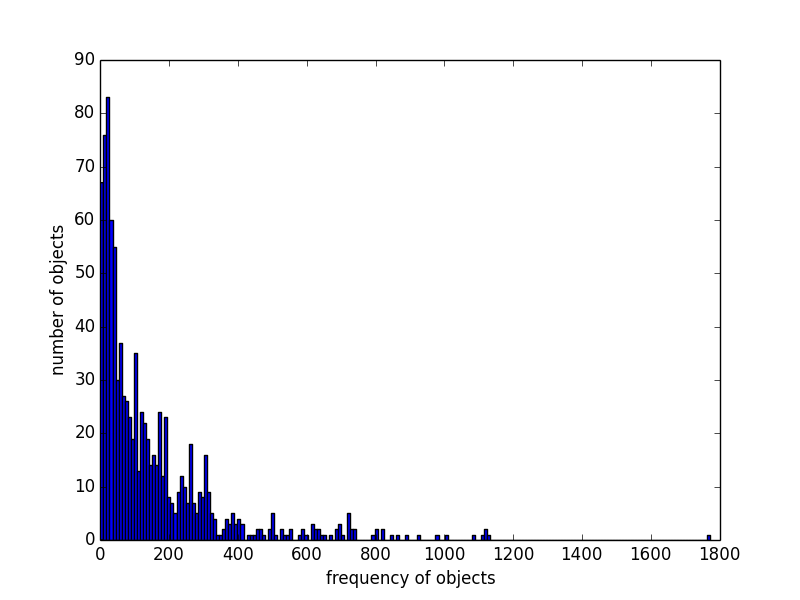

In [6]:
Image("hist_ptf_lc.png")

In [5]:
#frequency cut off line, which means if the objects has less than x observance, we drop it
x = 40
Id = [id for id, value in occurence.iteritems() if value >= x]

In [6]:
Id.remove(245482) #which does not have a value in the dict file
tbl2 = tbl[tbl["m.obj_id"].isin(Id)]

In [7]:
print len(tbl), len(tbl2)

2906480 2894640


In [8]:
#replace LinearId with CRTS id
ID_dict_file = pd.read_csv('lineardb_crts_labels_dict.fil')

In [9]:
ID_dict = dict(zip(ID_dict_file['linearID'].values,ID_dict_file['crts_id'].values))

In [10]:
tbl2["m.obj_id"] = [ID_dict[id] for id in tbl2["m.obj_id"]]

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
#tbl3 = tbl2[["m.obj_id","d.mjd","mag","magErr"]]
tbl2.to_csv("lineardb_lc_data_over40.csv", index = False, header =False)

--------------------------Output files that only contain light curves for a single filter-----------------------------

In [9]:
x = 40
occurencer = Counter(tblr["m.obj_id"])
Idr = [id for id, value in occurencer.iteritems() if value >= x]

occurenceg = Counter(tblg["m.obj_id"])
Idg = [id for id, value in occurenceg.iteritems() if id in Idr]
print len(Idg)

370


In [10]:
tblr2 = tblr[tblr["m.obj_id"].isin(Idr)]
tblg2 = tblg[tblg["m.obj_id"].isin(Idg)]
tblr3 = tblr2[["c.CRTSid","d.mjd","mag","magErr"]]
tblg3 = tblg2[["c.CRTSid","d.mjd","mag","magErr"]]

In [11]:
tblr3.to_csv("R_gcvs_crts_ptf.csv",header = False, index =False)
tblg3.to_csv("G_gcvs_crts_ptf_overlap.csv",header = False, index =False)

In [12]:
print "number of unique Ids in the filtered files:", "Red filter:", len(Idr), "| Green filter:", len(Idg)

number of unique Ids in the filtered files: Red filter: 561 | Green filter: 370
